In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

- Загружаем данные

In [13]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


- Первичный анализ 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- Проверка наличия пропусков

In [4]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- Пропусков нет

- Построение графиков

<Axes: xlabel='educational-num', ylabel='Count'>

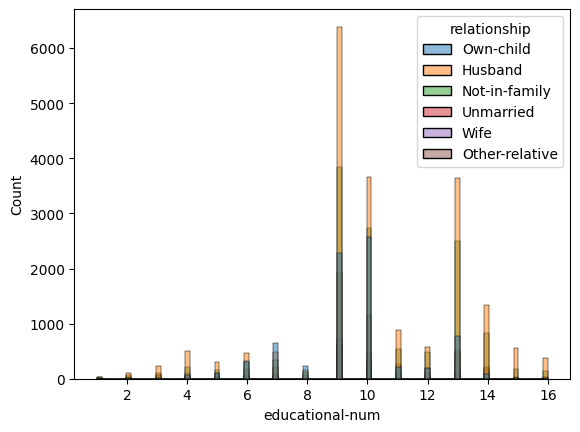

In [5]:
sns.histplot(data=df,x='educational-num',hue='relationship')

[Text(0, 0, 'Private'),
 Text(1, 0, 'Local-gov'),
 Text(2, 0, '?'),
 Text(3, 0, 'Self-emp-not-inc'),
 Text(4, 0, 'Federal-gov'),
 Text(5, 0, 'State-gov'),
 Text(6, 0, 'Self-emp-inc'),
 Text(7, 0, 'Without-pay'),
 Text(8, 0, 'Never-worked')]

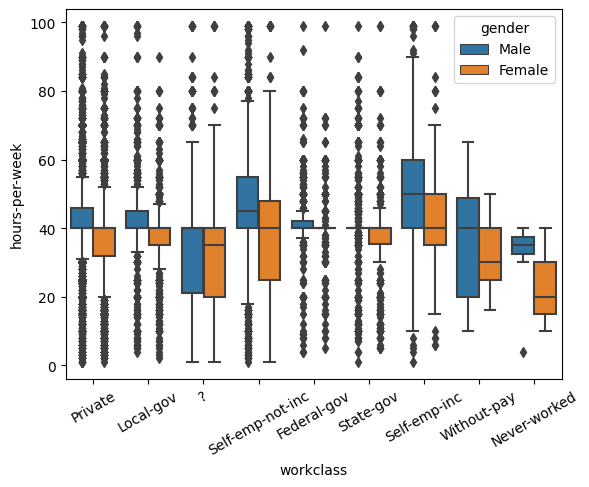

In [6]:
ax = sns.boxplot(data=df,x='workclass',y='hours-per-week', hue='gender' )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

- Выберем категориальные признаки

In [7]:
categorial_data = pd.get_dummies(df)
categorial_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
48838,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
48839,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
48840,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


- Разделить выборку на обучающее и тестовое подмножетсва.

In [8]:
X =categorial_data.drop(['income_<=50K', 'income_>50K'], axis=1)
X

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# целевая переменная (столбец income) снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
le.fit( df['income'] )

LabelEncoder()

In [11]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [14]:
y = pd.Series( data = le.transform( df['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

- Разделим данные на обучающие и тестовы

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Логистические регрессии

In [49]:
log_model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

- 80% данных оставить на обучающее множество, 20% на тестовое

In [51]:
log_model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [52]:
predictions

array([0, 0, 1, ..., 1, 0, 1])

In [53]:
log_model.predict(X_test)

array([0, 0, 1, ..., 1, 0, 1])

In [54]:
log_model.predict_proba(X_test)

array([[0.98716194, 0.01283806],
       [0.90009464, 0.09990536],
       [0.06605029, 0.93394971],
       ...,
       [0.42400445, 0.57599555],
       [0.99749396, 0.00250604],
       [0.26775599, 0.73224401]])

In [55]:
log_model.score(X_train,y_train)

0.8529163360888593

In [56]:
log_model.score(X_test,y_test)

0.8574060804585935

- метод опопрных векторов

In [ ]:
svr_model = make_pipeline(StandardScaler(), SVC())

In [59]:
svr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [60]:
svr_model.score(X_train, y_train)

0.8616691833235226

In [61]:
svr_model.score(X_test, y_test)

0.8540280479066434

Выводы:

    - Из графиков можно видеть, что женщины работают меньше мужчин
    
    - А также, достаточно очевидно, что замужние женщины тратят больше времени на образование
    
    - Логистическая модель предсказания даёт отличный результат, более 85%, но модель опорных векторов незначительно лучше. Так как это разница незначительная, то можно утверждать, что более лучший результат получился за счет случайного выбора.
    
    - за счет чего можно было бы улучшить модель, честно сказать не знаю.
    